In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [4]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


# Question 1 - Feature Observation

#Using your intuition, for each of the three features above, do you think that an increase in the value of 
#that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? 
#Justify your answer for each.
'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Answer:
    I think increasing the 'RM' would lead to an increase in the value of 'MEDV' because it indicated the requirement of rooms 
    is more than supply. It means it would be a "hot" area for MEDV.
    I think increasing the 'LSTAT' would lead to a decrerase in the value of 'MEDV'.
    I think increasing the 'PTRATIO' would lead to a decrease in the value of 'MEDV'.

In [5]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [6]:

# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


# Question 2 - Goodness of Fit

Would you consider this model to have successfully captured the variation of the target variable?
Why or why not?

Answer:
Yes, the R2 score of 0.923 means that 92 percent of the variance is predictable. 

In [7]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=7)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


# Question 3 - Training and Testing

What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

Answer:
Splitting a dataset into some ratio of training and testing subset can avoid overfitting and underfitting situation. It gives estimate of performance of an independent dataset and serves a check on overfitting.

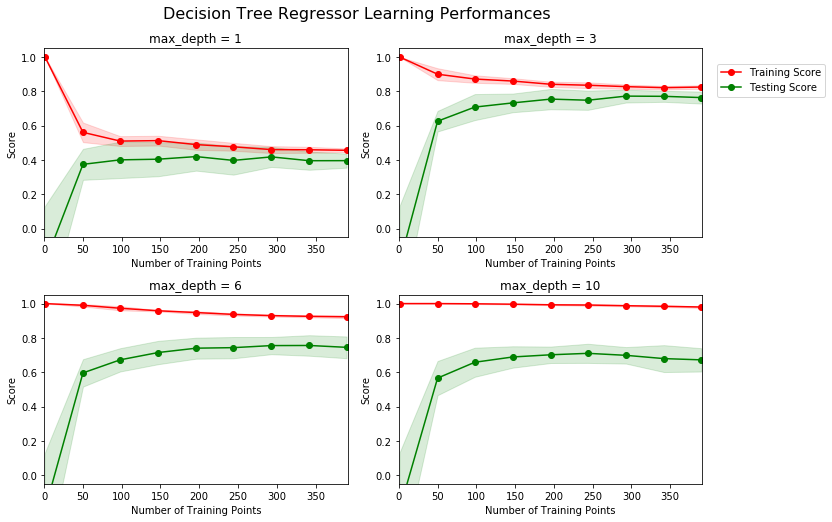

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

# Question 4 - Learning the Data

Choose one of the graphs above and state the maximum depth for the model.
What happens to the score of the training curve as more training points are added? What about the testing curve?
Would having more training points benefit the model?

Answer:
Choose the right of upside graphs which max_depth = 3. While more training points added, testing curve tend to more close to the training curve.

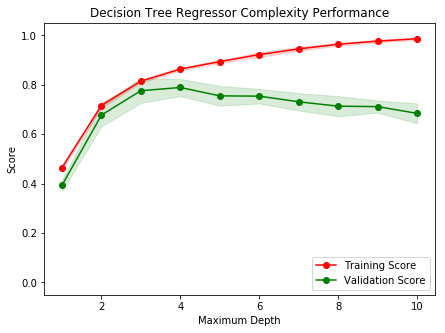

In [9]:
vs.ModelComplexity(X_train, y_train)

# Question 5 - Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

Answer:
Suffer from high bias. Trained with maximum depth of 10 will suffer from high variance(overfitting)

# Question 6 - Best-Guess Optimal Model

Which maximum depth do you think results in a model that best generalizes to unseen data?
What intuition lead you to this answer?

Answer:
Maximum depth = 3. When maximum depth>=4, validation score is getting apart from training score.

In [16]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better =True)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


In [13]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,232.00
Predicted selling price for Client 2's home: $229,200.00
Predicted selling price for Client 3's home: $979,300.00


# Question 7 - Grid Search

What is the grid search technique?
How it can be applied to optimize a learning algorithm?

Answer:
Grid Search is a exhaustive searching through a manually specified subset which choosing from a set of optimal hyperparameters. Grid search can train each model and select the best performance one by grid parameters.

# Question 8 - Cross-Validation

What is the k-fold cross-validation training technique?
What benefit does this technique provide for grid search when optimizing a model

Answer:
K-fold cross-validation is to separate all data into k subsets. One subset is kept for validation and other(k-1) subsets are used for training. The corss-validation process repeats k times(the folds) to get the average result. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. k-fold cross validation especially useful for small dataset since it maximize both test and training data. Grid-search is a way to select the best of a family of models through cross-validation score.

# Question 9 - Optimal Model

What maximum depth does the optimal model have? \
How does this result compare to your guess in Question 6?

Answer:
4 , I guessed 3 in Question 6. Very close.

# Question 10 - Predicting Selling Prices

Imagine that you were a real estate agent in the Boston area looking to use this model to help price 
homes owned by your clients that they wish to sell. You have collected the following information from 
three of your clients:
What price would you recommend each client sell his/her home at?
Do these prices seem reasonable given the values for the respective features?

Answer:
Client 1: 415,000.00, all features of client 1 are the middle of these clients. The price of client 1 should be the lower than client 3 and higher than client 2. 
Client 2: 399,000.00, client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools. The price of client 2 should be lowest among these clients. 
Client 3: 498,000.00,client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level. The price of the client 3 should be highest among these clients.

In [15]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


# Question 11 - Applicability

In a few sentences, discuss whether the constructed model should or should not be used in a real-world
setting.

Answer:
I think it should not be used in a real-world setting. It is not fair to judge the price of an individual home based on the characteristics of the entire neighborhood. The features present in the data are not sufficient to describe a home value.

In [17]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000
